In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#Read data

data = pd.read_csv('data/analysis/D1_XAUUSD_Clean.csv', parse_dates=[0])
data.set_index('Date',inplace=True)
print(data.head())

              Open    High     Low   Close  Volume    Weekday  Yearday
Date                                                                  
2003-05-05  340.35  342.59  339.73  341.31   11948     Monday      125
2003-05-06  341.53  344.21  340.28  343.28   12161    Tuesday      126
2003-05-07  343.45  344.19  339.00  341.23   11588  Wednesday      127
2003-05-08  341.28  348.13  339.96  347.38   12108   Thursday      128
2003-05-09  347.33  348.58  345.82  347.92   11539     Friday      129


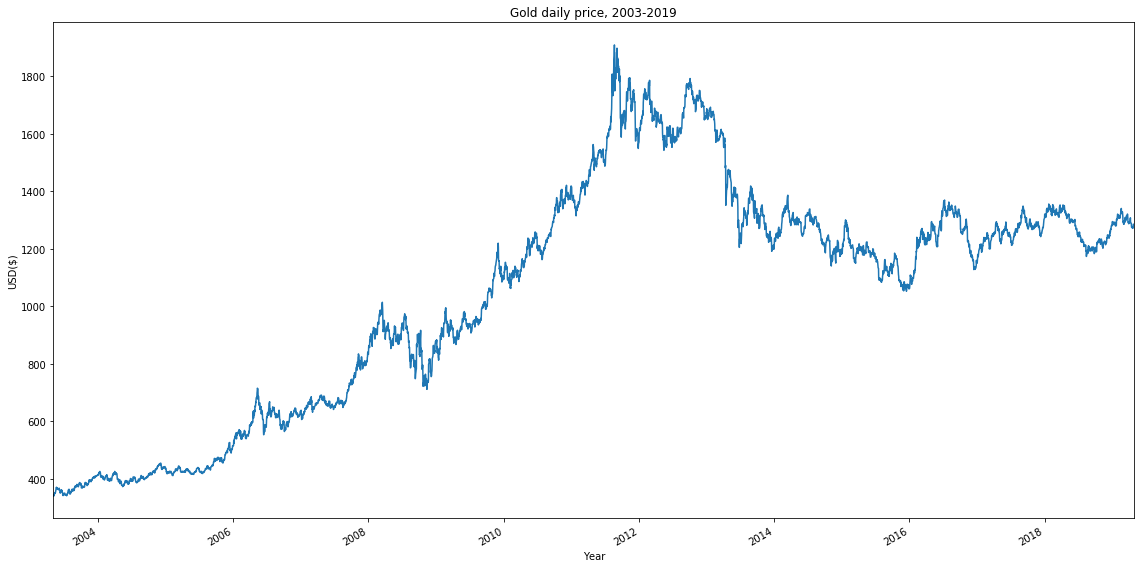

In [3]:
#Plot timeseries

fig, ax = plt.subplots(figsize=(16,8));

data['Close'].plot(ax=ax);

ax.set_title('Gold daily price, 2003-2019');
ax.set_ylabel('USD($)');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [4]:
#Returns data
data['Daily_return'] = data.Close.pct_change().mul(100)
print(data.tail())

               Open     High      Low    Close  Volume   Weekday  Yearday  \
Date                                                                        
2019-04-25  1274.63  1282.53  1273.31  1278.56   97134  Thursday      115   
2019-04-26  1278.56  1288.61  1273.72  1285.69  107326    Friday      116   
2019-04-28  1286.28  1286.62  1285.63  1285.80    1913    Sunday      118   
2019-04-29  1285.79  1286.57  1277.99  1280.33   80222    Monday      119   
2019-04-30  1280.32  1286.12  1279.84  1283.11  103615   Tuesday      120   

            Daily_return  
Date                      
2019-04-25      0.308325  
2019-04-26      0.557659  
2019-04-28      0.008556  
2019-04-29     -0.425416  
2019-04-30      0.217132  


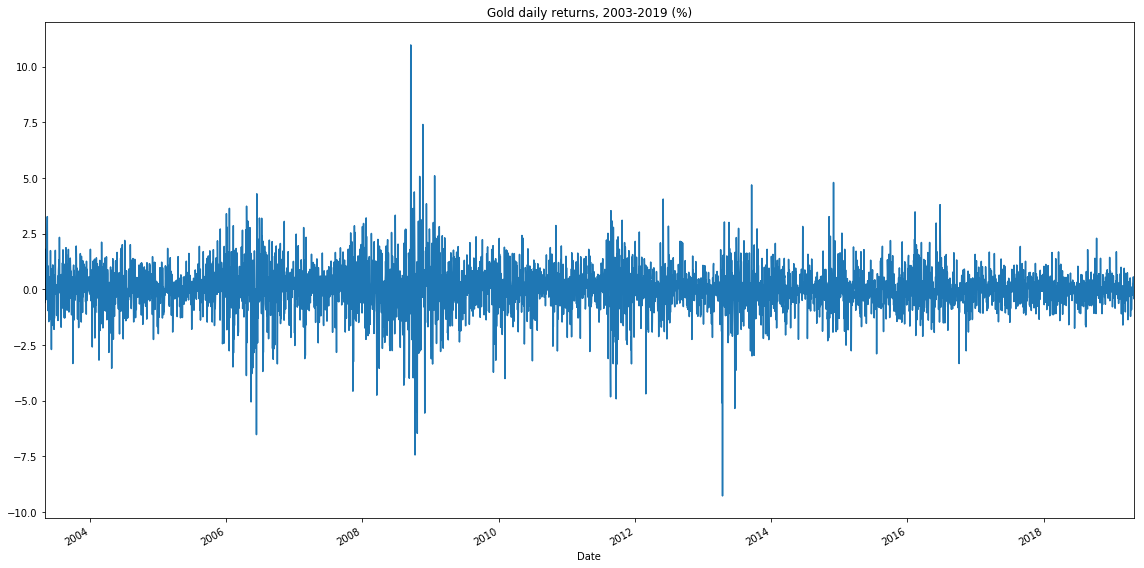

In [5]:
#Distribution plot
#x = pd.Series(data.Return_per_day, name="Rate of Return per day (%)")
#ax = sns.distplot(x)



fig, ax = plt.subplots(figsize=(16, 8))

data['Daily_return'].plot(ax=ax);

ax.set_title('Gold daily returns, 2003-2019 (%)');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [6]:
#Using log returns
data['Log_daily_Return'] = data['Close'].apply(lambda x: np.log(x)).diff()
print(data.head())

              Open    High     Low   Close  Volume    Weekday  Yearday  \
Date                                                                     
2003-05-05  340.35  342.59  339.73  341.31   11948     Monday      125   
2003-05-06  341.53  344.21  340.28  343.28   12161    Tuesday      126   
2003-05-07  343.45  344.19  339.00  341.23   11588  Wednesday      127   
2003-05-08  341.28  348.13  339.96  347.38   12108   Thursday      128   
2003-05-09  347.33  348.58  345.82  347.92   11539     Friday      129   

            Daily_return  Log_daily_Return  
Date                                        
2003-05-05           NaN               NaN  
2003-05-06      0.577188          0.005755  
2003-05-07     -0.597180         -0.005990  
2003-05-08      1.802303          0.017863  
2003-05-09      0.155449          0.001553  


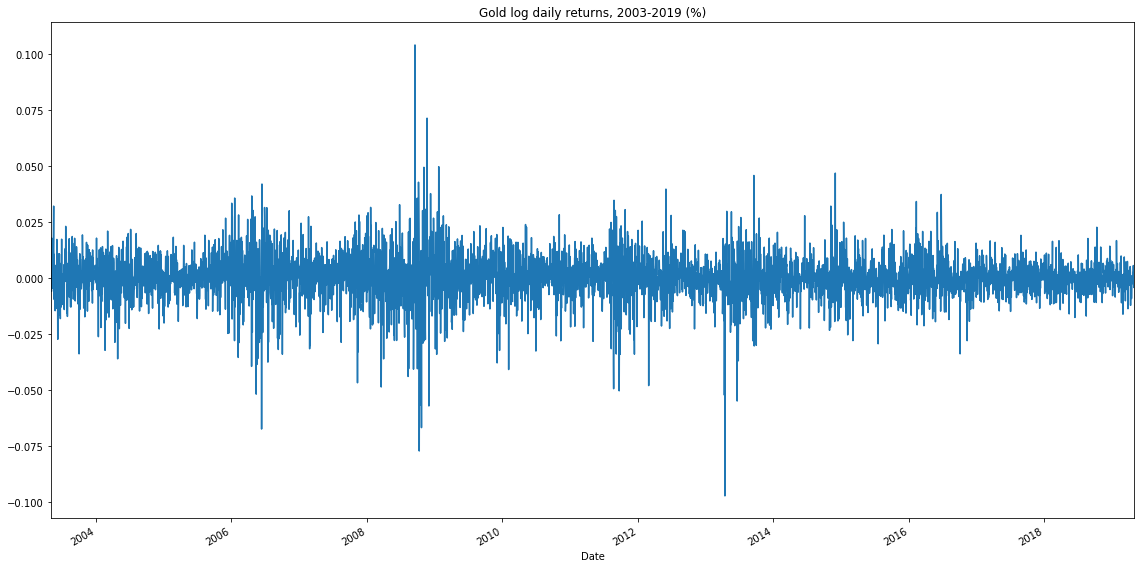

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))

data['Log_daily_Return'].plot(ax=ax);

ax.set_title('Gold log daily returns, 2003-2019 (%)');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [8]:
#Save data with returns for future analysis
data.to_csv('data/Analysis/D1_XAUUSD_Returns.csv')